In [8]:
import networkx
import shapely.geometry
import numpy as np
import networkx as nx

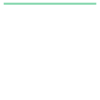

In [9]:
a = [1, 0]
b = [2, 0]

a_point = shapely.geometry.Point(*a )
b_point = shapely.geometry.Point(b[0], b[1])
edge_geometry = shapely.geometry.LineString([a_point, b_point])
edge_geometry

In [10]:
distance = 0.1
distances = np.arange(0, edge_geometry.length + distance, distance)
distances

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [11]:
# The determine the points based on the distances
points = [
    edge_geometry.interpolate(distance) 
    for distance 
    in distances
]
# Convert to Shapely geometry points
points = shapely.geometry.MultiPoint(points)

In [30]:
edges = {}
# loop over the start, end point pairs
edge_pairs = list(
    zip(
        list(points.geoms)[:-1], 
        list(points.geoms)[1:]
    )
)
for edge_i, (point_a, point_b) in enumerate(edge_pairs):    
    edge = shapely.geometry.LineString([point_a, point_b])
    node_a = edge_i
    node_b = edge_i + 1
    edges[(node_a, node_b)] = edge


In [32]:
# Create the graph
graph = nx.Graph()
for node_i, geom in enumerate(points.geoms):
    graph.add_node(i, geometry=geom)
for (node_a, node_b), edge in edges.items():
    graph.add_edge(node_a, node_b, geometry=edge)


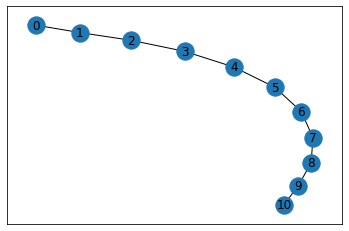

In [34]:
nx.draw_networkx(graph)